In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from pycaret.regression import *
import mlflow
# import mlflow.pycaret
from sklearn.model_selection import train_test_split
from mlflow.sklearn import log_model


In [2]:
import pycaret
pycaret.__version__

'3.3.2'

In [3]:
mlflow.__version__

'2.15.1'

In [18]:
pip uninstall mlflow


^C
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install mlflow==2.15.1


   ---------------------------------------- 0.0/26.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/26.3 MB ? eta -:--:--
    --------------------------------------- 0.5/26.3 MB 1.5 MB/s eta 0:00:17
   - -------------------------------------- 1.0/26.3 MB 1.7 MB/s eta 0:00:16
   - -------------------------------------- 1.3/26.3 MB 1.8 MB/s eta 0:00:15
   ---- ----------------------------------- 2.9/26.3 MB 2.9 MB/s eta 0:00:09
   ------ --------------------------------- 4.5/26.3 MB 3.9 MB/s eta 0:00:06
   --------- ------------------------------ 6.3/26.3 MB 4.6 MB/s eta 0:00:05
   ------------ --------------------------- 8.4/26.3 MB 5.4 MB/s eta 0:00:04
   -------------- ------------------------- 9.7/26.3 MB 5.6 MB/s eta 0:00:03
   ---------------- ----------------------- 11.0/26.3 MB 5.7 MB/s eta 0:00:03
   ------------------ --------------------- 12.1/26.3 MB 5.7 MB/s eta 0:00:03
   -------------------- ------------------- 13.4/26.3 MB 5.7 MB/s eta 0:00:03
   -------

  You can safely remove it manually.


In [20]:
print('hi')

hi


# Installing Libraries

In [15]:
pip install openpyxl

In [16]:
!pip install matplotlib seaborn pandas

In [89]:
import pandas as pd

df = pd.read_csv('data/processed_data.csv')
target_column = "Price"  # Replace with actual target column name


In [90]:
df.head()

,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,CouncilArea,Region,Age
0,3,t,840000,13.5,2,1.0,303,Moonee Valley,Western Metropolitan,7
1,2,h,1275000,3.3,1,0.0,120,Port Phillip,Southern Metropolitan,123
2,2,h,1455000,3.3,1,0.0,159,Port Phillip,Southern Metropolitan,53
3,4,h,2000000,6.4,2,4.0,853,Darebin,Northern Metropolitan,93
4,3,h,1110000,6.4,2,2.0,208,Yarra,Northern Metropolitan,10


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rooms        12211 non-null  int64  
 1   Type         12211 non-null  object 
 2   Price        12211 non-null  int64  
 3   Distance     12211 non-null  float64
 4   Bathroom     12211 non-null  int64  
 5   Car          12211 non-null  float64
 6   Landsize     12211 non-null  int64  
 7   CouncilArea  12211 non-null  object 
 8   Region       12211 non-null  object 
 9   Age          12211 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 954.1+ KB


In [112]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=123)


In [113]:
test_data.head()

,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,CouncilArea,Region,Age
2752,3,u,850000,10.4,2,1.0,307,Moonee Valley,Western Metropolitan,54
5240,3,h,830000,11.2,1,1.0,509,Darebin,Northern Metropolitan,95
2350,2,h,657000,11.2,2,1.0,268,Moonee Valley,Western Metropolitan,73
3456,3,h,1495000,4.5,1,1.0,259,Moreland,Northern Metropolitan,104
9556,3,h,1252000,11.4,1,1.0,376,Glen Eira,Southern Metropolitan,54


In [54]:
# End any active run
if mlflow.active_run():
    mlflow.end_run()

In [62]:
import mlflow

mlflow.search_experiments()


[<Experiment: artifact_location='mlflow-artifacts:/656368621410756639', creation_time=1740062523836, experiment_id='656368621410756639', last_update_time=1740062523836, lifecycle_stage='active', name='Dekai_MLOPS_Assignment', tags={}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1740044630122, experiment_id='0', last_update_time=1740044630122, lifecycle_stage='active', name='Default', tags={}>]

In [63]:
mlflow.tracking.MlflowClient().delete_experiment(0)


KeyboardInterrupt: 

In [64]:
# import pycaret regression and init setup
import mlflow
from pycaret.regression import *

# Setting up MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Set to your MLflow server URI
mlflow.set_experiment('Dekai_Melbourne_Residential_price_predictions')

2025/02/20 22:50:41 INFO mlflow.tracking.fluent: Experiment with name 'Dekai_Melbourne_Residential_price_predictions' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/512559149735951817', creation_time=1740063041735, experiment_id='512559149735951817', last_update_time=1740063041735, lifecycle_stage='active', name='Dekai_Melbourne_Residential_price_predictions', tags={}>

In [93]:
s = setup(data = train_data, 
          target = 'Price',
          normalize = True,
          transformation=True, 
          remove_outliers=True, 
          remove_multicollinearity=True, 
          multicollinearity_threshold=0.9,
          # ignore_features = ['Address', 'Date'],
          experiment_name='Dekai_Melbourne_Residential_price_predictions',
          log_experiment='mlflow',
          session_id = 123)  # Ensures reproducibility

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(9768, 10)"
4,Transformed data shape,"(9426, 19)"
5,Transformed train set shape,"(6495, 19)"
6,Transformed test set shape,"(2931, 19)"
7,Numeric features,6
8,Categorical features,3
9,Preprocess,True


In [94]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,177829.2020,85793749863.4674,291296.2700,0.7887,0.2123,0.1670,0.9420
lightgbm,Light Gradient Boosting Machine,179945.1964,86105240159.3125,291620.6753,0.7882,0.2157,0.1705,0.2510
xgboost,Extreme Gradient Boosting,186549.6013,93288101857.0488,303913.4147,0.7702,0.2237,0.1753,0.1270
gbr,Gradient Boosting Regressor,193267.7299,94690094004.0907,306801.1284,0.7657,0.2303,0.1852,0.1580
rf,Random Forest Regressor,187865.8325,98037865384.4301,311508.0145,0.7588,0.2236,0.1764,0.3190
et,Extra Trees Regressor,192207.6459,102342460446.4513,318495.5945,0.7480,0.2287,0.1796,0.2720
knn,K Neighbors Regressor,213732.9098,123680184770.8458,349442.9214,0.6971,0.2517,0.1972,0.0870
br,Bayesian Ridge,262151.2032,152308046234.3778,388687.5654,0.6251,0.4594,0.2883,0.0770
lar,Least Angle Regression,262297.2930,152321900549.8641,388709.4320,0.6250,0.4591,0.2886,0.0780
lasso,Lasso Regression,262296.8354,152321850847.2854,388709.3541,0.6250,0.4591,0.2886,0.0990


2025/02/20 22:56:03 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/02/20 22:56:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run CatBoost Regressor at: http://127.0.0.1:5000/#/experiments/512559149735951817/runs/9d36b50799bc463081ea24ed4cd79a44.
2025/02/20 22:56:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/512559149735951817.
2025/02/20 22:56:04 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/02/20 22:56:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Light Gradient Boosting Machine at: http://127.0.0.1:5000/#/experiments/512559149735951817/runs/733184e48ee845e09188675239f9ebd2.
2025/02/20 22:56:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#

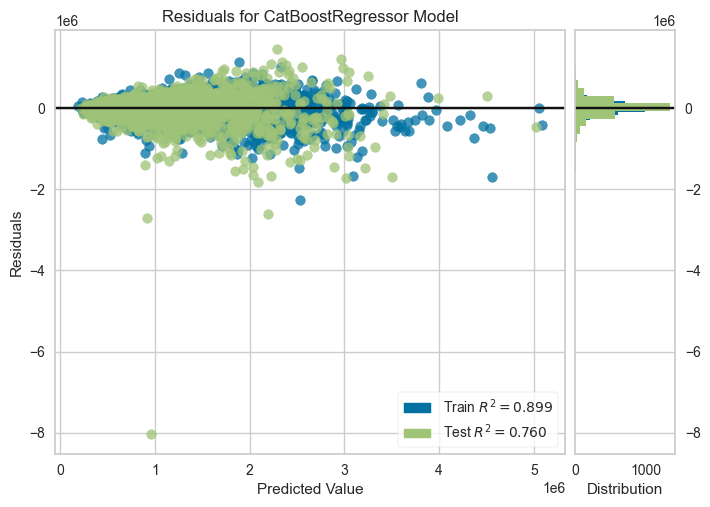

In [95]:
# plot residuals
plot_model(best, plot = 'residuals')

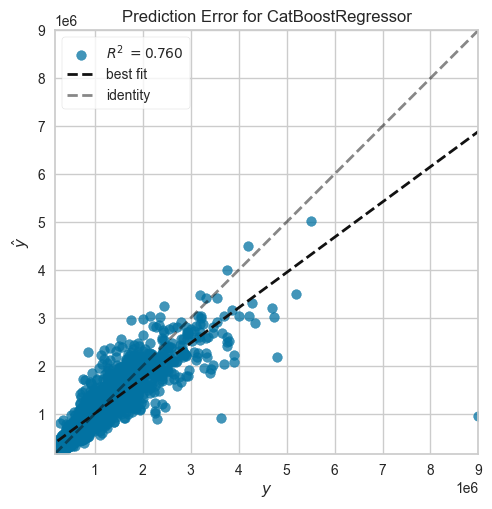

In [96]:
# plot error
plot_model(best, plot = 'error')

In [97]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Model Tuning

In [98]:
tuned_catboost , tuner_catboost = tune_model(best, return_tuner=True, n_iter=5, optimize='R2', fold=5)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,182563.6265,85783685336.6903,292888.5203,0.7572,0.2262,0.1809
1,184692.1980,94370305321.3190,307197.5021,0.7780,0.2177,0.1678
2,185156.0532,78860204751.0984,280820.5918,0.7951,0.2180,0.1732
3,194101.0172,83396680807.7692,288784.8348,0.7757,0.2350,0.1897
4,194045.8594,115944348377.2908,340506.0181,0.7634,0.2293,0.1845
Mean,188111.7509,91671044918.8335,302039.4934,0.7739,0.2252,0.1792
Std,4945.6269,13143233982.5627,21052.0624,0.0131,0.0067,0.0078


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2025/02/20 22:56:35 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/02/20 22:56:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run CatBoost Regressor at: http://127.0.0.1:5000/#/experiments/512559149735951817/runs/2bc8b3d637cc4644b8e18361598bc065.
2025/02/20 22:56:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/512559149735951817.


In [99]:
# tuner object
tuner_catboost

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Rooms',
                                                                          'Distance',
                                                                          'Bathroom',
                                                                          'Car',
                                                                          'Landsize',
                                                                          'Age'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['Type',
                                                                          'CouncilArea',
                                                                          'Region'],
                                                                 transfor...
                                                                  0.5],
                                        'actual_estimator__l2_leaf_reg': [1, 2,
                                                                          3, 4,
                                                                          5, 6,
                                                                          7, 8,
                                                                          9, 10,
                                                                          20,
                                                                          30,
                                                                          50,
                                                                          100,
                                                                          200],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                                           170,
                                                                           180,
                                                                           190,
                                                                           200,
                                                                           210,
                                                                           220,
                                                                           230,
                                                                           240,
           

In [100]:
best_model = tuned_catboost

In [101]:
best_model

In [102]:
holdout_pred = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,175373.8563,97633274422.0578,312463.2369,0.7601,0.2109,0.1627


In [103]:
holdout_pred.head()

,Rooms,Type,Distance,Bathroom,Car,Landsize,CouncilArea,Region,Age,Price,prediction_label
10840,3,t,2.3,2,1.0,61,Melbourne,Northern Metropolitan,103,1000000,1.241999e+06
5324,3,h,13.4,1,1.0,614,Whitehorse,Eastern Metropolitan,54,1100000,1.209368e+06
3293,3,h,7.9,2,2.0,665,Banyule,Eastern Metropolitan,54,1680000,1.534763e+06
9929,1,u,11.8,1,1.0,0,Glen Eira,Southern Metropolitan,13,362000,3.370035e+05
7455,3,h,13.9,1,2.0,686,Glen Eira,Southern Metropolitan,73,1352000,1.196417e+06


In [114]:
test_data.drop('Price', axis=1, inplace=True)


In [115]:
test_data.head()

,Rooms,Type,Distance,Bathroom,Car,Landsize,CouncilArea,Region,Age
2752,3,u,10.4,2,1.0,307,Moonee Valley,Western Metropolitan,54
5240,3,h,11.2,1,1.0,509,Darebin,Northern Metropolitan,95
2350,2,h,11.2,2,1.0,268,Moonee Valley,Western Metropolitan,73
3456,3,h,4.5,1,1.0,259,Moreland,Northern Metropolitan,104
9556,3,h,11.4,1,1.0,376,Glen Eira,Southern Metropolitan,54


In [116]:
pred = predict_model(best_model, test_data)

In [117]:
pred.head()


,Rooms,Type,Distance,Bathroom,Car,Landsize,CouncilArea,Region,Age,prediction_label
2752,3,u,10.4,2,1.0,307,Moonee Valley,Western Metropolitan,54,7.983818e+05
5240,3,h,11.2,1,1.0,509,Darebin,Northern Metropolitan,95,8.529240e+05
2350,2,h,11.2,2,1.0,268,Moonee Valley,Western Metropolitan,73,6.871174e+05
3456,3,h,4.5,1,1.0,259,Moreland,Northern Metropolitan,104,9.939035e+05
9556,3,h,11.4,1,1.0,376,Glen Eira,Southern Metropolitan,54,1.051640e+06


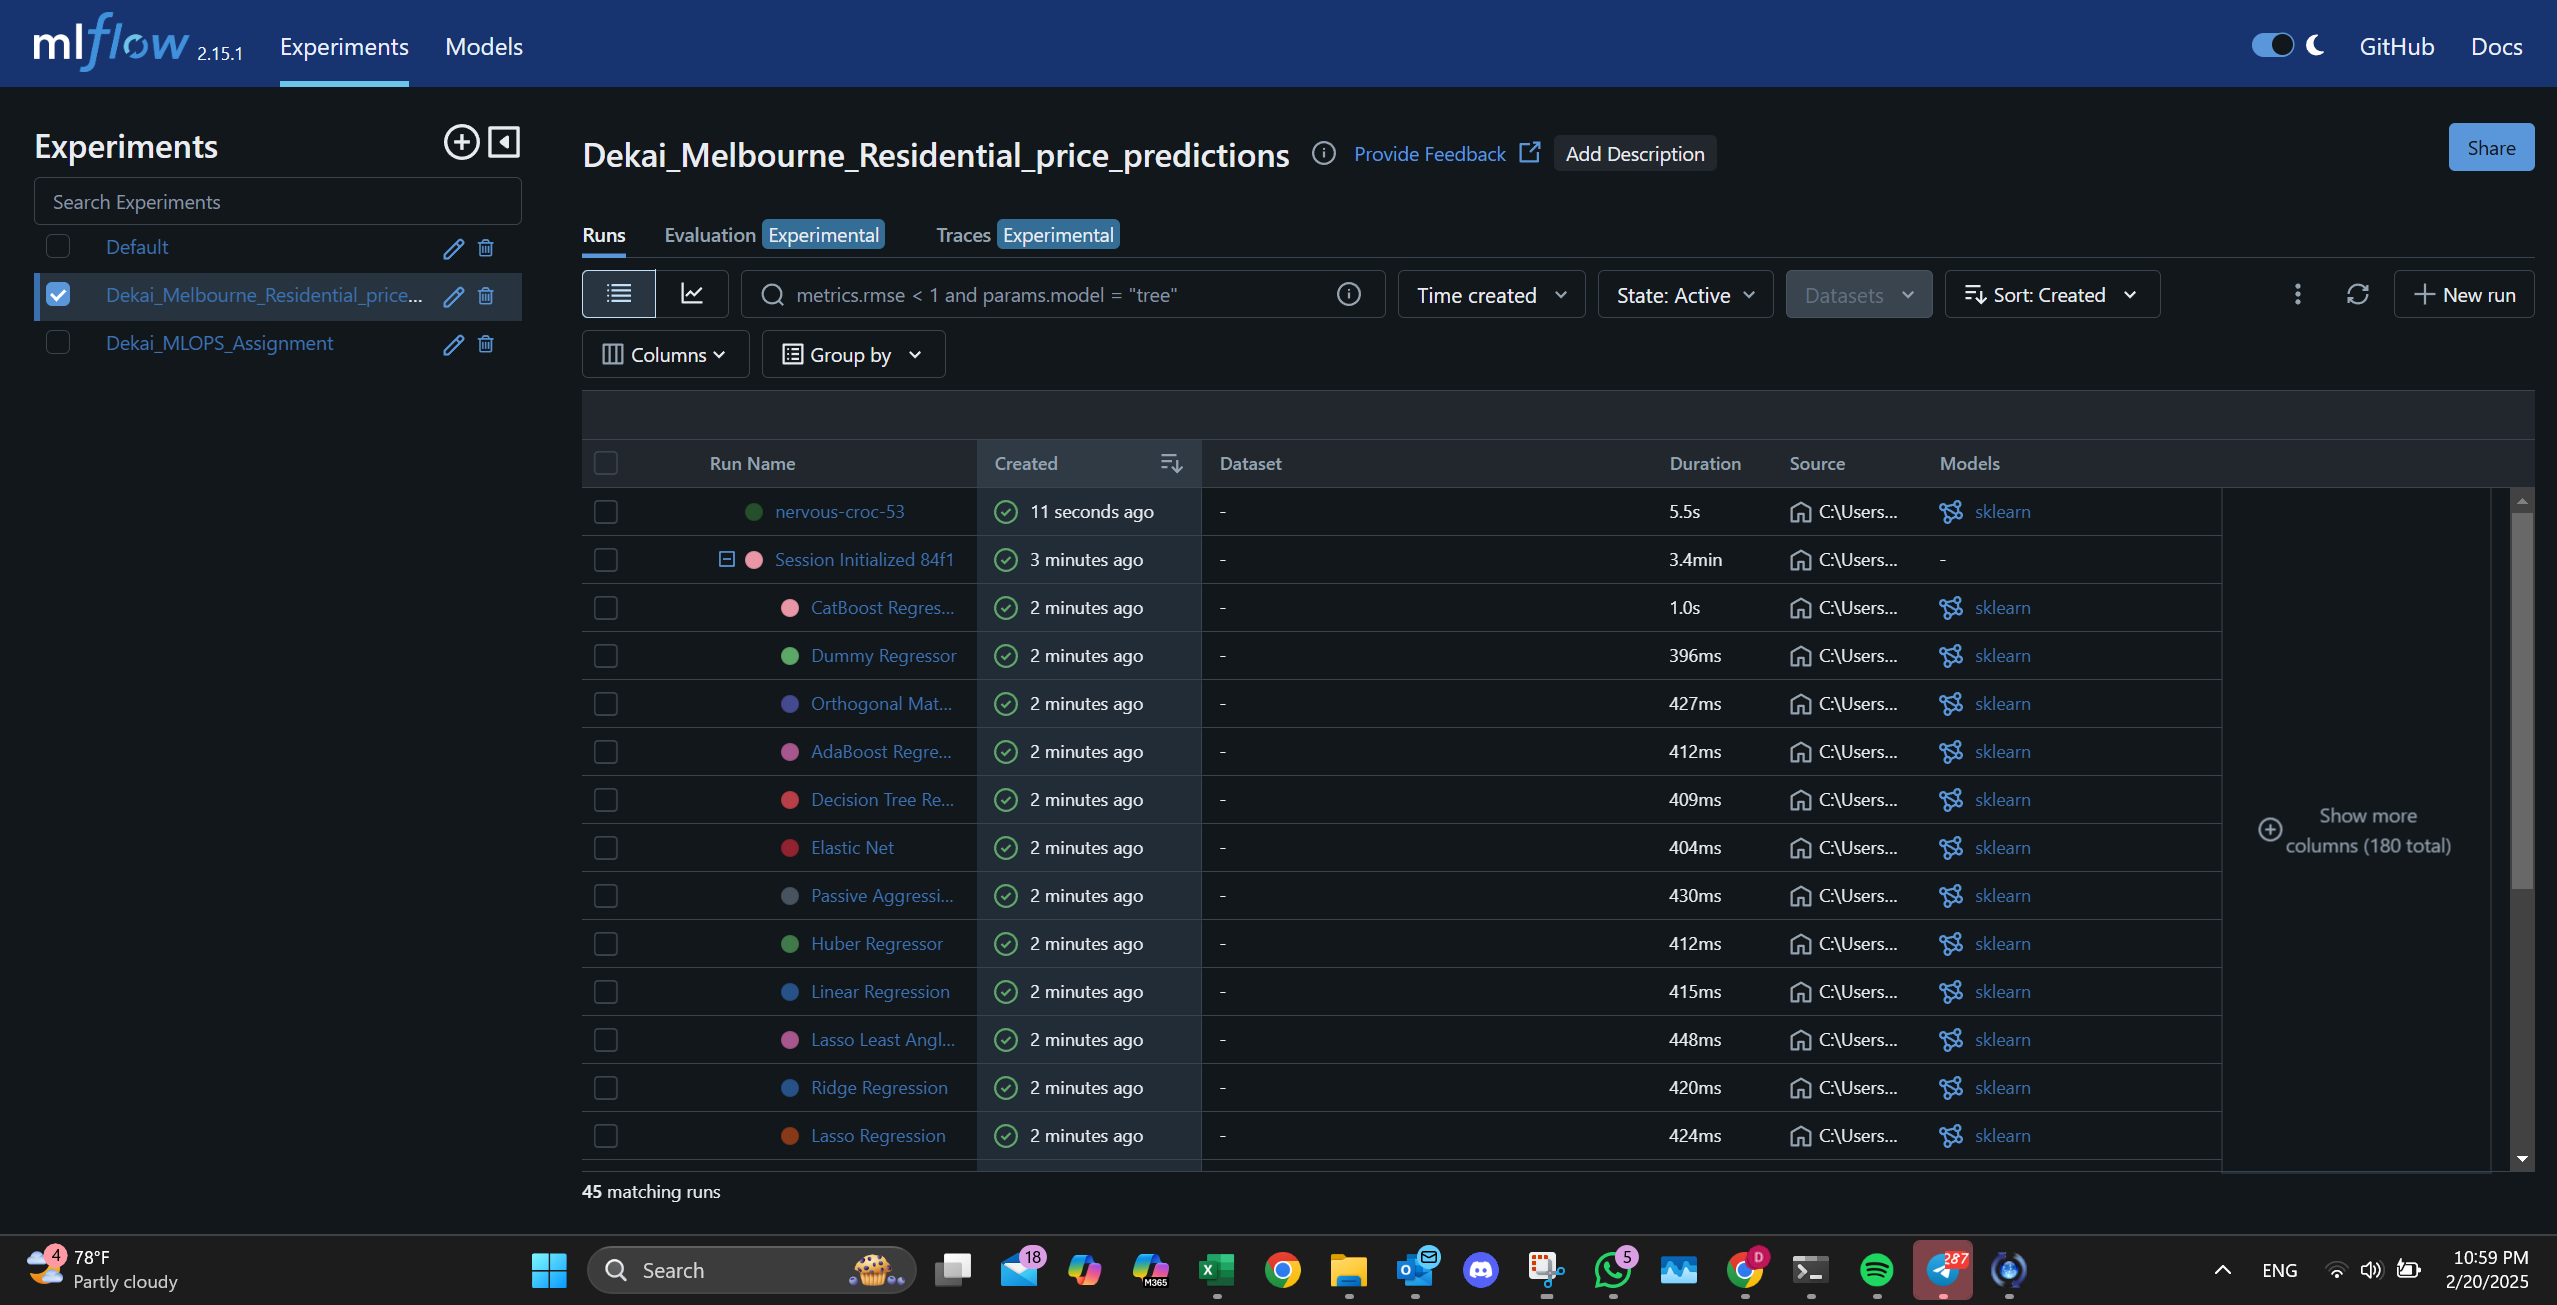

# Saving the pipeline

In [118]:
save_model(best_model, 'Dekai_Melbourne_Residential_price_predictions')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Rooms', 'Distance', 'Bathroom',
                                              'Car', 'Landsize', 'Age'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Type', 'CouncilArea', 'Region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrappe...
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
                 ('remove_outliers',
                  TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScale

In [119]:
# load pipeline
loaded_best_pipeline = load_model('Dekai_Melbourne_Residential_price_predictions')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\forwo\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Rooms', 'Distance', 'Bathroom',
                                             'Car', 'Landsize', 'Age'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Type', 'CouncilArea', 'Region'],
                                    transformer=SimpleImputer(strategy='most_frequent'...
                                    transformer=RemoveMulticollinearity(threshold=0.9))),
                ('remove_outliers',
                 TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x000001E529016E30>)])

# Registering to MLFLOW

In [120]:
# Set up MLflow
mlflow.set_tracking_uri("http://localhost:5000")
experiment = mlflow.get_experiment_by_name("Dekai_Melbourne_Residential_price_predictions")
print(f"Current experiment ID: {experiment.experiment_id}")

Current experiment ID: 512559149735951817


In [122]:

def register_model_with_mlflow(model, model_name="best_model", experiment_id=None):
    # End any active runs
    mlflow.end_run()
    
    # Start a new run with the correct experiment ID
    if experiment_id is not None:
        # Use the experiment_id directly when starting the run
        with mlflow.start_run(experiment_id=experiment_id):
            try:
                log_model(model, model_name)
                print(f"Model registered with MLflow as {model_name}")
            except Exception as e:
                print(f"Error logging model: {e}")
            finally:
                mlflow.end_run()
    else:
        print("No experiment ID provided. Please provide a valid experiment ID.")

# Retrieve the correct experiment ID and ensure it is correctly assigned
experiment_id = "512559149735951817"  # Update this with the correct ID you have confirmed

# Assuming 'best_model' is the correct model object you want to register
register_model_with_mlflow(best_model, model_name="best_model_regression_Dekai", experiment_id=experiment_id)
print("Pipeline execution completed.")

2025/02/20 22:58:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Session Initialized d5ba at: http://localhost:5000/#/experiments/512559149735951817/runs/b8d38767c642415f9dc50b4628a4bd33.
2025/02/20 22:58:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/512559149735951817.
2025/02/20 22:58:54 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/02/20 22:58:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run nervous-croc-53 at: http://localhost:5000/#/experiments/512559149735951817/runs/c3e11b8a8ff943fbb8997f90f09a92eb.
2025/02/20 22:58:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/512559149735951817.


Model registered with MLflow as best_model_regression_Dekai
Pipeline execution completed.
